In [98]:
from sympy import sin, cos
import matplotlib.pyplot as plt # Plot
import numpy as np # Arrays

# Input data
Left = 3 # = S`(x0)
Right = -5 # = S``(xn)
a = 10
b = 16
n = 5

N = n + 1

# Creating empty lists
xi_ = np.ones(N, dtype=np.float64(0.))
yi_ = np.ones(N, dtype=np.float64(0.))
hi_ = np.ones(N, dtype=np.float64(0.))

# Interpolant 
def f(t):
    if t > 13:
        return 100
    else:
        return 101

def fi(t):
    return t**3*sin(t) + t*4 + 5

In [99]:
# Filling x, y, h arrays
for i in range(1, n):
    k = float(a+(b-a)/n*(i+(0*cos(5*i))))
    xi_[i] = k
    yi_[i] = f(k)
xi_[n] = b
yi_[n] = f(b)
xi_[0] = a
yi_[0] = f(a)

for k in range(N-1):
    hi_[k] = xi_[k+1] - xi_[k]

In [101]:
def TMA(): # Tridiagonal Matrix Algorithm - to find second diff
    # Creating empty lists
    m_ = np.ones(N, dtype=np.float64(0.)) 
    al_ = np.ones(N-1, dtype=np.float64(0.))
    bet_ = np.ones(N-1, dtype=np.float64(0.))
    
    al_[N-2] = 0
    bet_[N-2] = Right
    
    for k in range(N-3, -1, -1):
        A = hi_[k]/6
        B = (hi_[k] + hi_[k+1])/3
        C = hi_[k+1]/6
        F = (yi_[k+2] - yi_[k+1])/hi_[k+1] - (yi_[k+1] - yi_[k])/hi_[k]
        
        al_[k] = -A/(B + C*al_[k+1])
        bet_[k] = (F - bet_[k+1]*C)/(B + C*al_[k+1])

    B = hi_[0]/3
    C = hi_[0]/6
    F = (yi_[1] - yi_[0])/hi_[0] - Left
    
    f = B + C*al_[0]
    g = F - bet_[0]*C
    if f == 0:
        if g == 0:
            m_[0] = 0
        else:
            print("ERROR!!!")
    else: 
        m_[0] = (-bet_[0]*C + F)/(al_[0]*C + B)
        
    for k in range(1, N):
        m_[k] = (m_[k-1]*al_[k-1] + bet_[k-1])
    
    m_[N-1] = Right
    
    return m_

In [102]:
sd = TMA()
def S(t): # Interpolating function
    for k in range(N-1):
        if xi_[k] <= t <= xi_[k+1]:
            return (yi_[k]*(xi_[k+1] - t)/(hi_[k]) 
                    + yi_[k+1]*(-xi_[k] + t)/(hi_[k]) 
                    + sd[k]*((xi_[k+1] - t)**3 - hi_[k]**2*(xi_[k+1] - t))/(6*hi_[k]) 
                    + sd[k+1]*((-xi_[k] + t)**3 - hi_[k]**2*(-xi_[k] + t))/(6*hi_[k]))

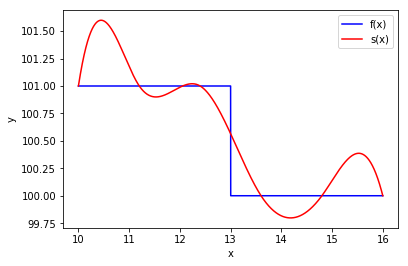

In [103]:
def create_lists(): # lists for plots
    l = 10000
    xi = []
    y1 = []
    y2 = []
    delta = (xi_[N-1] - xi_[0])/l
    for k in range(l+1):
        xi.append(xi_[0] + delta*k)
        y1.append(f(xi_[0] + delta*k))
        y2.append(S(xi_[0] + delta*k))
    return xi, y1, y2
        
def plotty(): # Plots
    fig, ax = plt.subplots()
    x_, y1, y2 = create_lists()
    ax.plot(x_, y1, color="blue", label="f(x)")
    ax.plot(x_, y2, color="red", label="s(x)")
    ax.set_xlabel("x")                              
    ax.set_ylabel("y")                             
    ax.legend()

    plt.show()

    
plotty()

In [104]:
def check(): # aproxim. first and second diff
    t = 0.000001
    print("dS/dx(x0): ", float((S(xi_[0] + t) - S(xi_[0]))/t))
    print("d2S/dx2(xn): ", float(((-2)*float(S(xi_[N-1] - t)) + S(xi_[N-1]) + S(xi_[N-1] - 2*t)))/t**2)


check()

dS/dx(x0):  2.9999955728499117
d2S/dx2(xn):  -4.959588295605499
